In [188]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

# Bring in files and load into dataframe

In [189]:
states = input("Enter state: ")
states = states.lower()

Enter state: oregon


In [190]:
path = f"C:/Users/Fiona/Documents/School/UofA Boot Camp/Github Repositories/COVID-19.io/data/{states}_data/{states}_master_file.csv"
master_df = pd.read_csv(path)
master_df = master_df[master_df.County != 'Unassigned']

# Format dataframe

In [191]:
import datetime as dt
master_df['Date'] = master_df['Date'].apply(pd.to_datetime)
master_df['Date'] = master_df['Date'].dt.strftime('%m/%d')
master_df.sort_values(by=['County','Date'], inplace=True)
master_df = master_df.drop(columns=['FIPS', 'State','Country','lat','lon','Active','Combined_Key'])
master_df = master_df.drop(columns=['Confirmed.1'])
master_df = master_df.dropna()

# Pivot dataframe for confirmed cases

In [192]:
try:
    master_df_confirmed = master_df.pivot(index=master_df.columns[0],
                  columns=master_df.columns[1],
                  values= master_df.columns[2])
except:
    master_df_confirmed = master_df.pivot_table(index='County', columns='Date', values='Confirmed')
dates_confirmed = list(master_df_confirmed.columns)
master_df_confirmed = master_df_confirmed.sort_values(by=dates_confirmed[-1], ascending=False)
master_df_confirmed = master_df_confirmed.dropna()
master_df_confirmed=master_df_confirmed[master_df_confirmed[dates_confirmed[-1]]!=0].dropna()
master_df_confirmed.to_html(f'data/{states}_data/{states}_table.html')
master_df_confirmed

Date,03/22,03/23,03/24,03/25,03/26,03/27,03/28,03/29,03/30,03/31,04/01,04/02,04/03,04/04,04/05,04/06,04/07,04/08,04/09,04/10
County,,,,,,,,,,,,,,,,,,,,
Washington,55.0,69.0,76.0,96.0,104.0,122.0,140.0,154.0,168.0,186.0,189.0,211.0,228.0,228.0,259.0,259.0,271.0,282.0,311.0,311.0
Multnomah,19.0,21.0,25.0,33.0,45.0,67.0,81.0,91.0,100.0,116.0,134.0,160.0,175.0,175.0,233.0,233.0,243.0,258.0,302.0,302.0
Marion,22.0,30.0,32.0,43.0,57.0,83.0,94.0,109.0,123.0,141.0,151.0,164.0,178.0,178.0,198.0,198.0,209.0,215.0,235.0,235.0
Clackamas,12.0,14.0,17.0,21.0,21.0,31.0,36.0,39.0,40.0,50.0,56.0,61.0,66.0,66.0,84.0,84.0,90.0,97.0,109.0,109.0
Deschutes,10.0,10.0,10.0,10.0,15.0,18.0,20.0,23.0,25.0,24.0,27.0,32.0,36.0,36.0,39.0,39.0,40.0,44.0,50.0,50.0
Linn,19.0,20.0,21.0,25.0,26.0,28.0,32.0,36.0,36.0,37.0,37.0,37.0,37.0,37.0,43.0,43.0,44.0,45.0,49.0,49.0
Jackson,2.0,2.0,3.0,4.0,4.0,6.0,8.0,19.0,20.0,21.0,22.0,27.0,27.0,27.0,33.0,33.0,39.0,39.0,44.0,44.0
Lane,4.0,4.0,4.0,5.0,7.0,10.0,9.0,10.0,12.0,16.0,18.0,21.0,21.0,21.0,27.0,27.0,29.0,30.0,33.0,33.0
Polk,1.0,3.0,3.0,3.0,6.0,10.0,11.0,13.0,15.0,18.0,18.0,18.0,20.0,20.0,24.0,24.0,26.0,28.0,29.0,29.0


# Matplotlib for confirmed cases

In [193]:
filter_list = master_df_confirmed[dates_confirmed[-1]]
li_1 = []
li_5000 = []
li_200 = []
li_50 = []
li_min = []
li_zero = []
count = 0
for i in filter_list:
    if i == 0:
        li_zero.append(master_df_confirmed.iloc[count])
    elif i <= 10:
        li_min.append(master_df_confirmed.iloc[count])
    elif i <= 50:
        li_50.append(master_df_confirmed.iloc[count])
    elif i <= 300:
        li_200.append(master_df_confirmed.iloc[count])
    elif i <= 5000:
        li_5000.append(master_df_confirmed.iloc[count])
    else:
        li_1.append(master_df_confirmed.iloc[count])
    count+=1
count

26

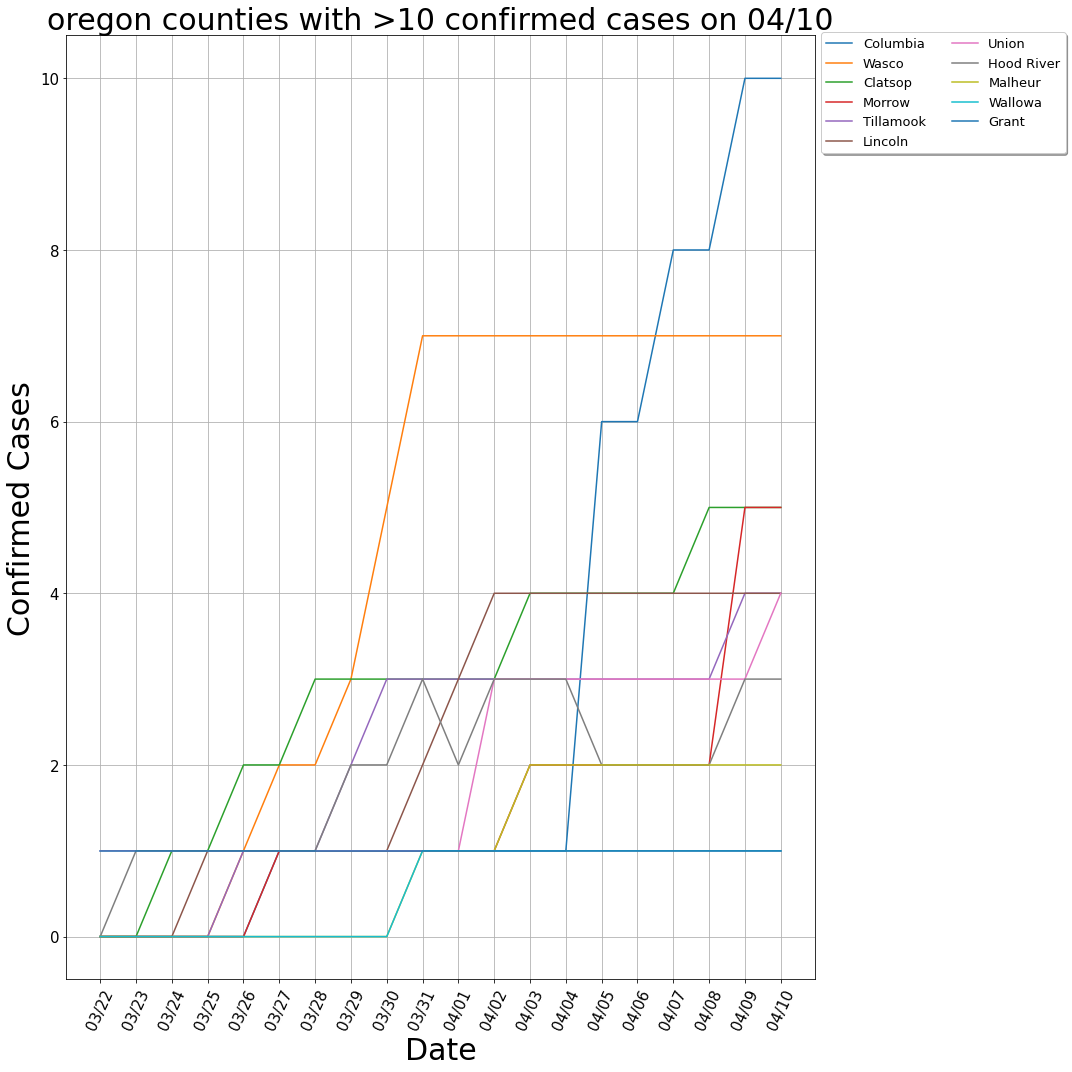

In [194]:
if len(li_min) != 0:
    if len(li_min) > 75:
        plt.figure(figsize=(15,12))
        for i in li_min:
            plt.plot(i,label = i.name,)
        plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=13)
        plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
        plt.xlabel("Date",fontsize=30)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xticks(rotation=65,fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)
    else:
        plt.figure(figsize=(15,15))
        for i in li_min:
            plt.plot(i,label = i.name,)
        plt.legend(loc='upper left', ncol=2, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=13)
        plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
        plt.xlabel("Date",fontsize=30)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xticks(rotation=65,fontsize=15)
        plt.yticks(fontsize=15)
        plt.grid()
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_confirmed_fig_1.png',dpi=200)

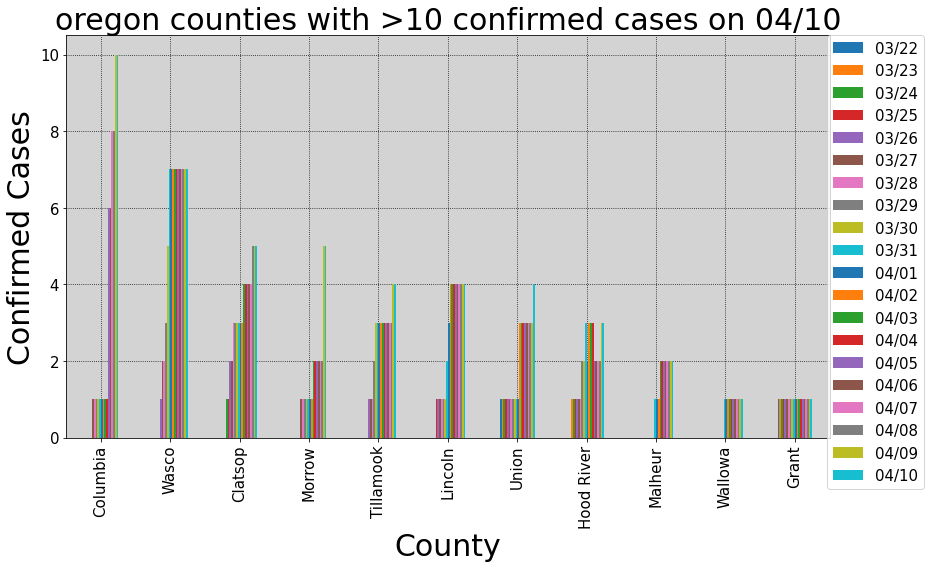

In [195]:
if len(li_min) != 0:
    if len(li_min) > 65:
        li_min_df = pd.DataFrame(li_min)
        neww = li_min_df.plot.bar(figsize=(17,8),zorder=2,fontsize=10)
        neww.set_facecolor("lightgrey")
        plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xlabel("County",fontsize=30)
        plt.grid(zorder=0, color="black",linestyle="dotted")
        plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
        plt.show()
    else:
        li_min_df = pd.DataFrame(li_min)
        neww = li_min_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
        neww.set_facecolor("lightgrey")
        plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
        plt.ylabel("Confirmed Cases",fontsize=30)
        plt.xlabel("County",fontsize=30)
        plt.grid(zorder=0, color="black",linestyle="dotted")
        plt.title(f"{states} counties with >10 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
        plt.tight_layout()
        plt.savefig(f'data/{states}_data/{states}_bar_confirmed1.png',dpi=200)
        plt.show()

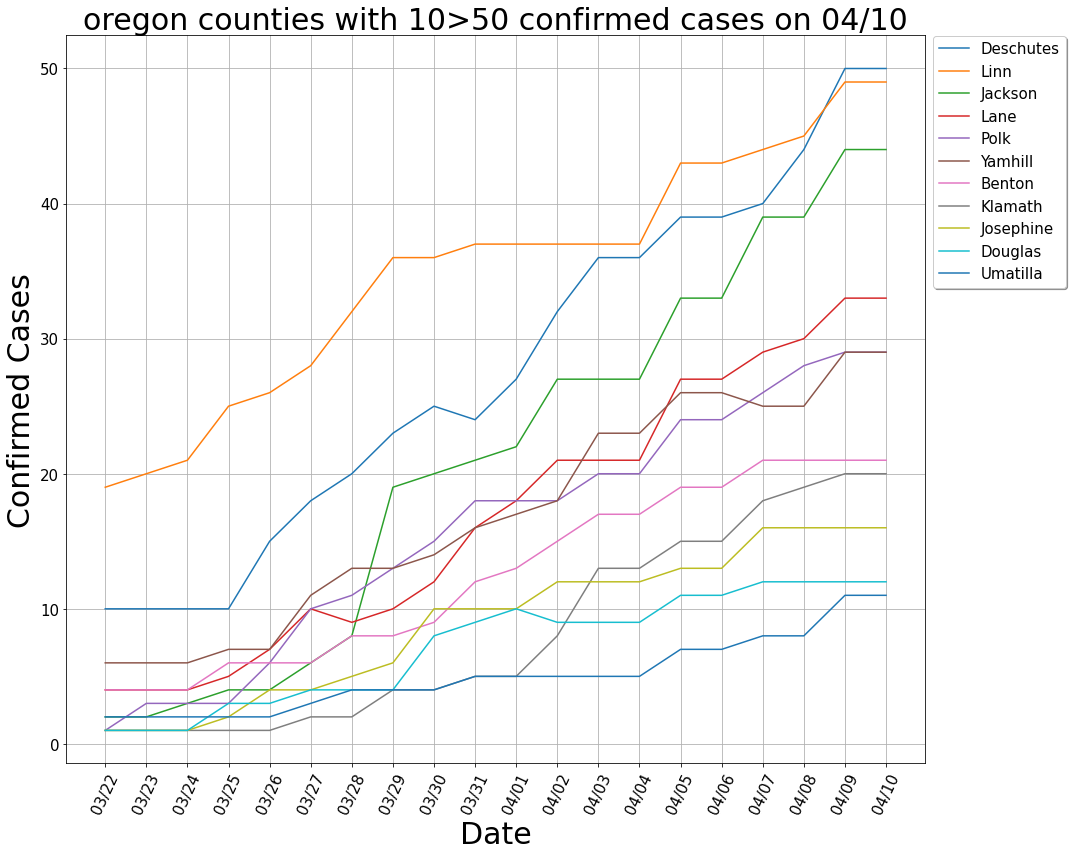

In [196]:
plt.figure(figsize=(15,12))
for i in li_50:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xticks(rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_2.png',dpi=200)

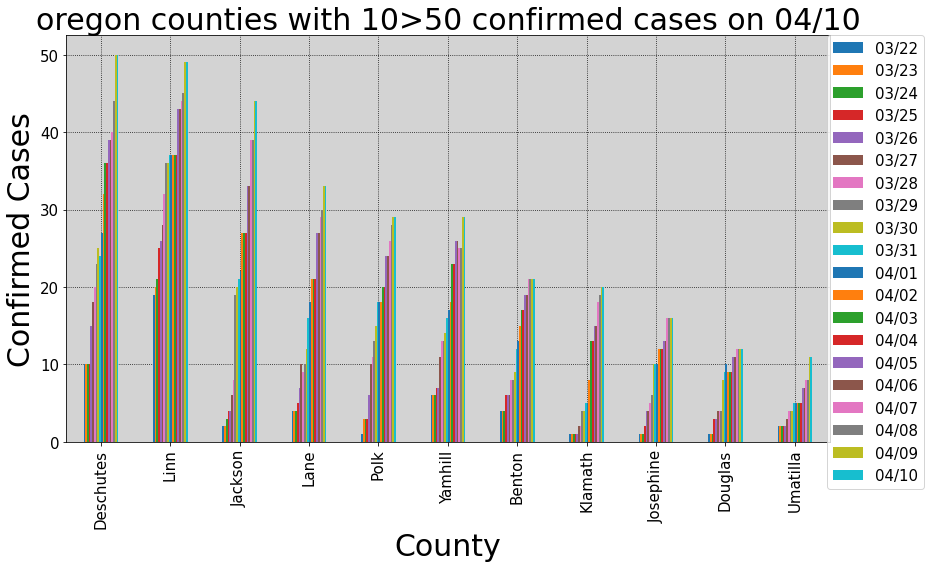

In [197]:
li_50_df = pd.DataFrame(li_50)
neww = li_50_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xlabel("County",fontsize=30)
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 10>50 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed2.png',dpi=200)
plt.show()

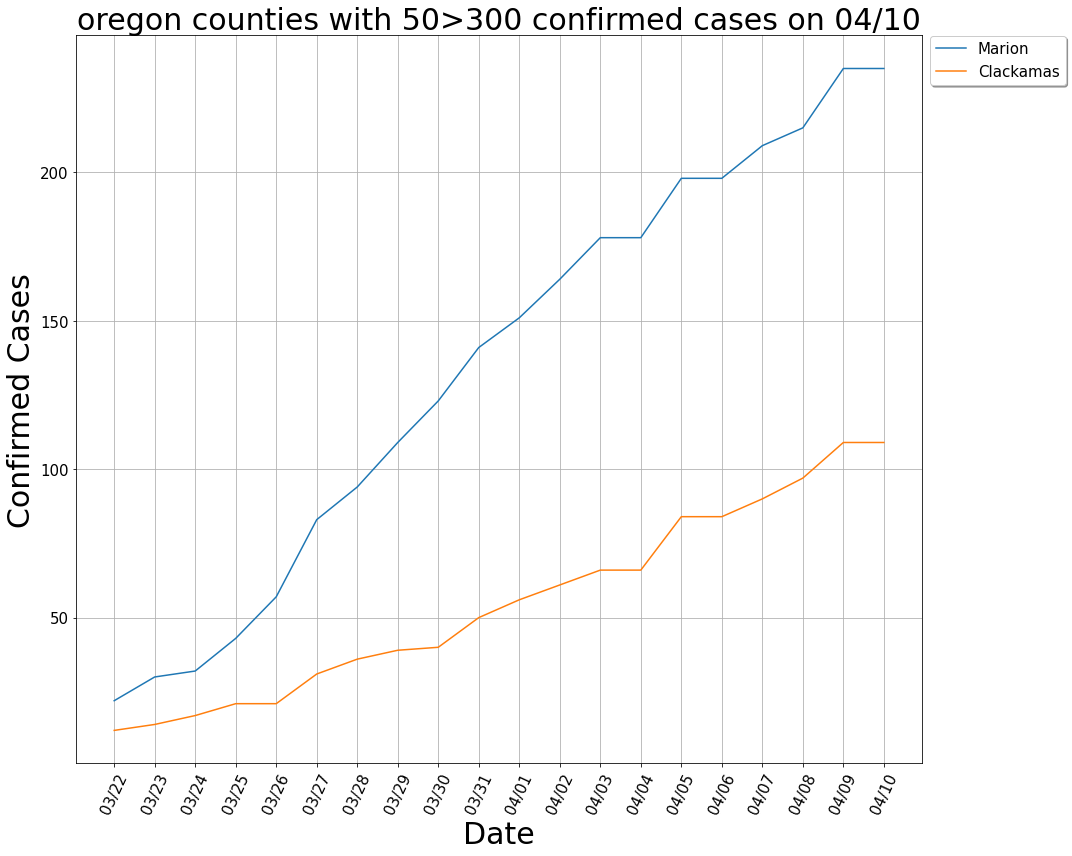

In [198]:
plt.figure(figsize=(15,12))
for i in li_200:
    plt.plot(i,label = i.name,)
plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.xlabel("Date",fontsize=30)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xticks(rotation=65,fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_confirmed_fig_3.png',dpi=200)

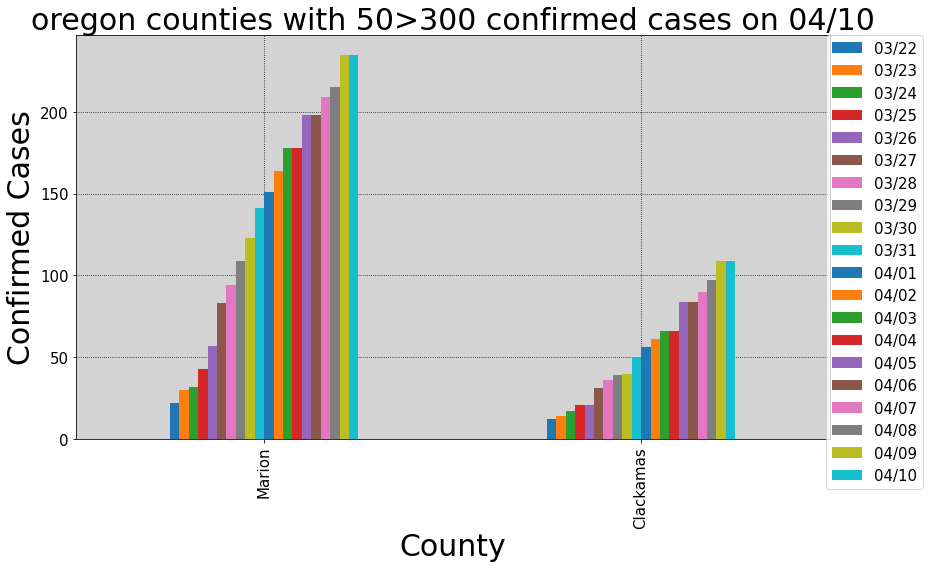

In [199]:
li_200_df = pd.DataFrame(li_200)
neww = li_200_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
neww.set_facecolor("lightgrey")
plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
plt.ylabel("Confirmed Cases",fontsize=30)
plt.xlabel("County",fontsize=30)
plt.grid(zorder=0, color="black",linestyle="dotted")
plt.title(f"{states} counties with 50>300 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
plt.tight_layout()
plt.savefig(f'data/{states}_data/{states}_bar_confirmed3.png',dpi=200)
plt.show()

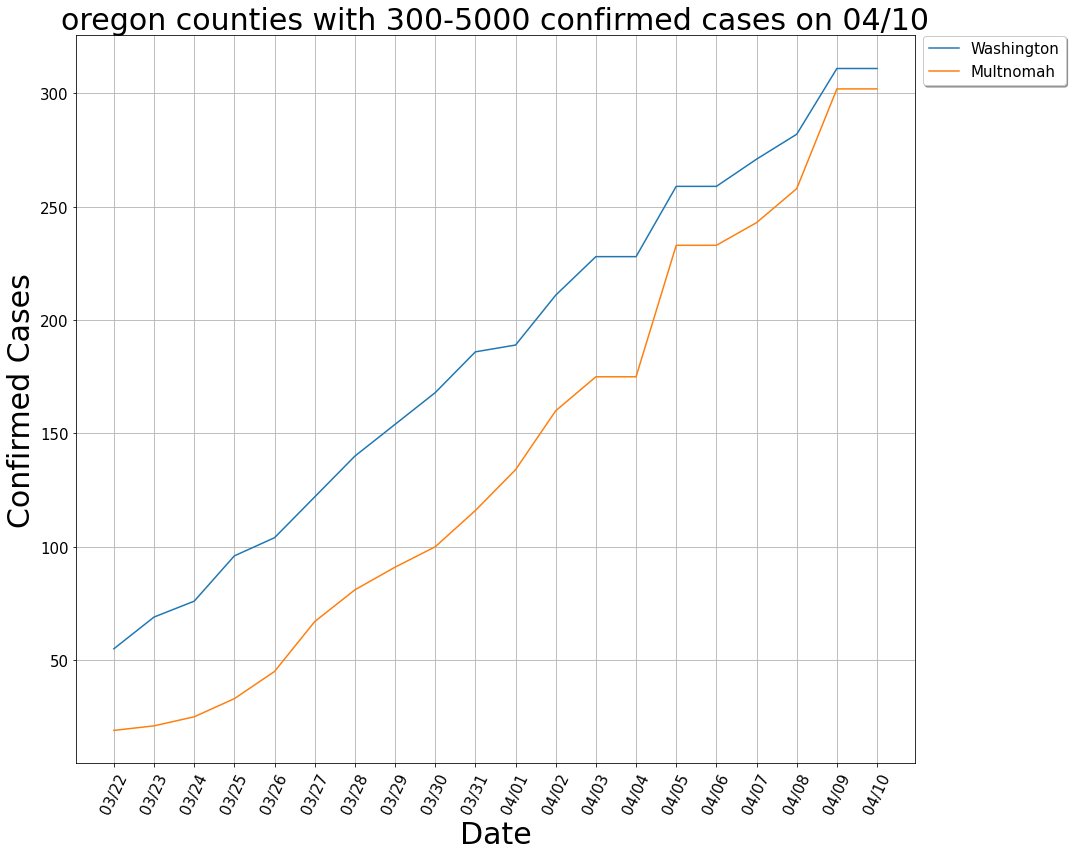

In [200]:
if len(li_5000) != 0:
    plt.figure(figsize=(15,12))
    for i in li_5000:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_4.png',dpi=200)

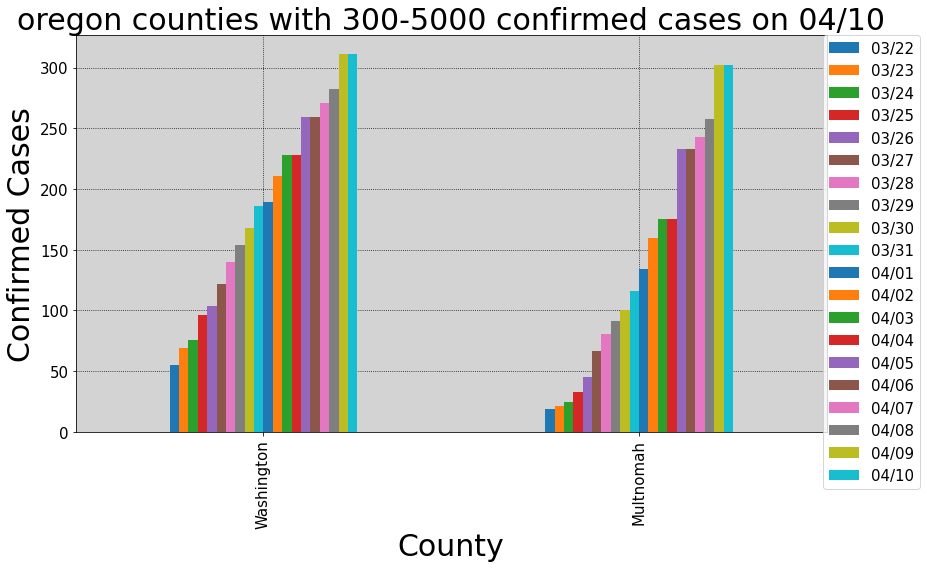

In [201]:
if len(li_5000) != 0:
    li_5000_df = pd.DataFrame(li_5000)
    neww = li_5000_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)   
#     last_num=0
#     if len(li_5000) < 2:
#         for i in neww.patches:
#             if last_num != 0:
#                 inc_amt = i.get_height()-last_num
#                 neww.text(i.get_x(), i.get_height(), \
#                     str(f'+{inc_amt}'), fontsize=12,color='black')
#             last_num = int(i.get_height())
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 300-5000 confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed4.png',dpi=200)
    plt.show()

In [202]:
if len(li_1) != 0:
    plt.figure(figsize=(15,12))
    for i in li_1:
        plt.plot(i,label = i.name,)
    plt.legend(loc='upper left', ncol=1, fancybox=True, shadow=True, bbox_to_anchor=(1.0, 1.01),fontsize=15)
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.xlabel("Date",fontsize=30)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xticks(rotation=65,fontsize=15)
    plt.yticks(fontsize=15)
    plt.grid()
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_confirmed_fig_5.png',dpi=200)

In [203]:
if len(li_1) != 0:
    li_1_df = pd.DataFrame(li_1)
    neww = li_1_df.plot.bar(figsize=(13,8),zorder=2,fontsize = 15)
#     for i in neww.patches:
#         if last_num != 0:
#             inc_amt = i.get_height()-last_num
#             neww.text(i.get_x(), i.get_height(), \
#                 str(f'+{inc_amt}'), fontsize=12,color='black')
#         last_num = int(i.get_height())
    neww.set_facecolor("lightgrey")
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} counties with 5000+ confirmed cases on {dates_confirmed[-1]}",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed5.png',dpi=200)
    plt.show()

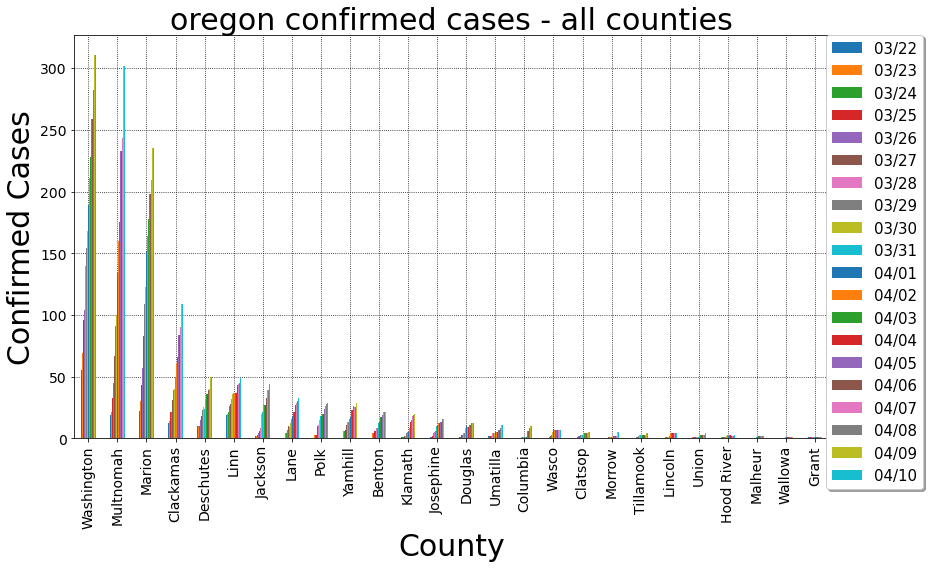

In [204]:
if count > 65:
    neww = master_df_confirmed.plot.bar(figsize=(17,8),zorder=2,fontsize = 7)
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} confirmed cases - all counties",fontsize=30)
    # plt.xticks(rotation=65)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
    plt.show()
else:
    neww = master_df_confirmed.plot.bar(figsize=(13,8),zorder=2,fontsize = 14)
    plt.legend(loc='upper center', bbox_to_anchor=(1.06, 1.02), ncol=1, fancybox=True, shadow=True,fontsize=15)
    plt.ylabel("Confirmed Cases",fontsize=30)
    plt.xlabel("County",fontsize=30)
    plt.grid(zorder=0, color="black",linestyle="dotted")
    plt.title(f"{states} confirmed cases - all counties",fontsize=30)
    plt.tight_layout()
    plt.savefig(f'data/{states}_data/{states}_bar_confirmed.png',dpi=200)
    plt.show()